In [1]:
import pickle
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# Load the features
with open('features.pkl', 'rb') as f:
    features = pickle.load(f)

# Load the target
with open('target.pkl', 'rb') as f:
    target = pickle.load(f)

# Load the test features
with open('test_features.pkl', 'rb') as f:
    test_features = pickle.load(f)

# Load the test target
with open('test_target.pkl', 'rb') as f:
    test_target = pickle.load(f)

# Load the validation features
with open('validation_features.pkl', 'rb') as f:
    validation_features = pickle.load(f)

# Load the validation target
with open('validation_target.pkl', 'rb') as f:
    validation_target = pickle.load(f)

In [3]:
def calculate_rmse_and_predict(model, features, actual):
    predicted = model.predict(features)
    residuals = actual - predicted
    rmse = np.sqrt(np.mean(residuals**2))
    return rmse, predicted

# K Fold Cross Validation

Optimal k: 17


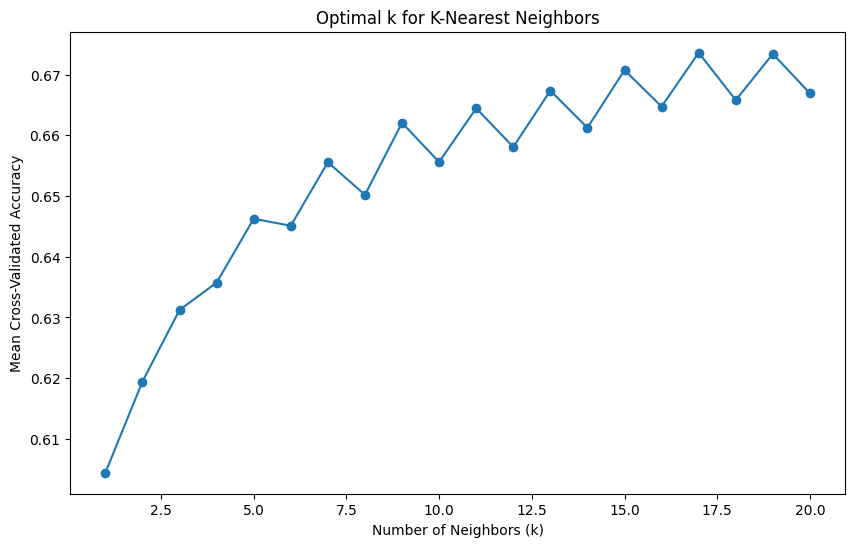

In [4]:
# Define the range of k values to try
k_values = range(1, 21)

# Initialize a list to store the mean cross-validated accuracy for each k
mean_cv_scores = []

# Loop over the k values
for k in k_values:
    # Initialize the K-Nearest Neighbors Classifier with the current k
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation and calculate the mean accuracy
    cv_scores = cross_val_score(knn_clf, features, target, cv=5, scoring='accuracy')
    mean_cv_scores.append(np.mean(cv_scores))

# Find the optimal k
optimal_k = k_values[np.argmax(mean_cv_scores)]
print(f"Optimal k: {optimal_k}")

# Plot the mean cross-validated accuracy for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Optimal k for K-Nearest Neighbors')
plt.show()

In [6]:
def train_knn_model(metric, k, features, target, test_features, test_target, validation_features, validation_target):
    # Initialize the K-Nearest Neighbors Classifier with the specified metric and k
    knn_clf = KNeighborsClassifier(metric=metric, n_neighbors=k)
    
    # Train the classifier
    knn_clf.fit(features, target)
    
    # Predict on the test data
    knn_test_predictions = knn_clf.predict(test_features)
    
    # Calculate the accuracy
    knn_test_accuracy = accuracy_score(test_target, knn_test_predictions)
    
    # Calculate RMSE and predictions for test data
    knn_rmse_test, knn_test_predictions = calculate_rmse_and_predict(knn_clf, test_features, test_target)
    
    # Calculate RMSE and predictions for validation data
    knn_rmse_validation, knn_validation_predictions = calculate_rmse_and_predict(knn_clf, validation_features, validation_target)
    
    results = {
        'Accuracy': knn_test_accuracy,
        'RMSE (test set)': knn_rmse_test,
        'RMSE (Val set)': knn_rmse_validation
    }
    
    # Display the results
    print(f"KNN Test Accuracy with {metric} distance (k={k}): {knn_test_accuracy}")
    print(f"KNN RMSE on test data with {metric} distance: {knn_rmse_test}")
    print(f"KNN RMSE on validation data with {metric} distance: {knn_rmse_validation}")
    
    return results


In [7]:
with open('model_results.pkl', 'rb') as f:
    model_results = pickle.load(f)

In [8]:
# Train and store results for Euclidean distance
model_results['KNN (Euclidean)'] = train_knn_model('euclidean', optimal_k, features, target, test_features, test_target, validation_features, validation_target)

KNN Test Accuracy with euclidean distance (k=17): 0.6755519655358104
KNN RMSE on test data with euclidean distance: 0.5696034010293386
KNN RMSE on validation data with euclidean distance: 0.5694202602891684


In [9]:
# Train and store results for Manhattan distance
model_results['KNN (Manhattan)'] = train_knn_model('manhattan', optimal_k, features, target, test_features, test_target, validation_features, validation_target)

KNN Test Accuracy with manhattan distance (k=17): 0.6743852091186502
KNN RMSE on test data with manhattan distance: 0.5706266650633757
KNN RMSE on validation data with manhattan distance: 0.5673677197449616


In [10]:
# Train and store results for Minkowski distance
model_results['KNN (Minkowski)'] = train_knn_model('minkowski', optimal_k, features, target, test_features, test_target, validation_features, validation_target)

KNN Test Accuracy with minkowski distance (k=17): 0.6755519655358104
KNN RMSE on test data with minkowski distance: 0.5696034010293386
KNN RMSE on validation data with minkowski distance: 0.5694202602891684


In [11]:
# Save updated model results
with open('model_results.pkl', 'wb') as f:
    pickle.dump(model_results, f)

In [12]:
model_results

{'Logistic Regression': {'Accuracy': 0.7095674026207144,
  'RMSE (test set)': np.float64(0.5389179876189749),
  'RMSE (Val set)': np.float64(0.5342105920462471)},
 'Decision Trees (Optimal k)': {'Accuracy': 0.7282355052952791,
  'RMSE (test set)': np.float64(0.5213103631280707),
  'RMSE (Val set)': np.float64(0.5225765422252234)},
 'Random Forest': {'Accuracy': 0.7173756955663256,
  'RMSE (test set)': np.float64(0.5316242135509578),
  'RMSE (Val set)': np.float64(0.5297401319296363)},
 'KNN (Euclidean)': {'Accuracy': 0.6755519655358104,
  'RMSE (test set)': np.float64(0.5696034010293386),
  'RMSE (Val set)': np.float64(0.5694202602891684)},
 'KNN (Manhattan)': {'Accuracy': 0.6743852091186502,
  'RMSE (test set)': np.float64(0.5706266650633757),
  'RMSE (Val set)': np.float64(0.5673677197449616)},
 'KNN (Minkowski)': {'Accuracy': 0.6755519655358104,
  'RMSE (test set)': np.float64(0.5696034010293386),
  'RMSE (Val set)': np.float64(0.5694202602891684)}}